# Medidas, erros e arredondamentos 

No nosso dia a dia, estamos acostumados a fazer algumas medidas com instrumentos como régua, trena, fita métrica, balança, proveta, jarra medidora, termômetro e cronômetro. A menor unidade na escala graduada de cada um desses instrumentos corresponde à precisão do instrumento. 

Por exemplo, 

- <b> Comprimentos: </b> Ao usar uma régua $30$ cm  para medir o comprimento de uma folha, temos $1$ cm dividido em $10$, de modo que a menor medida que conseguimos ler é de $1$ mm. Esta é normalmente a menor divisão da trena e da fita métrica. Medir um móvel vai ter como resultado, por exemplo, $H \times L \times P =$ $75,0$ cm $\times$ $45,5$ cm $\times$ $30,0$ cm.  


- <b> Massa: </b> Ao medir seu peso em uma consulta médica ou em uma farmácia, normalmente a medida aparece com um dígito $60,3$ Kg, significando que a precisão daquela balança é de $0.1$ Kg. Pesar alimentos para receitas de confeitaria exige um pouco mais de precisão, e as balanças comerciais mais baratinhas conseguem medir entre $1$ g e $10$ Kg. Se você for pesar polvilho azedo para fazer [pão de queijo](https://carolfiorentino.com.br/2015/08/13/pao-de-queijo-2/), deve ver algo como $300,2$ g. Um caminhão já exige uma balança adequada para medir toneladas.


- <b> Volume: </b> Algumas jarras de liquidificador têm também uma escala que vai de $125$ mL. Se sua vitamina de Whey pede $300$ mL de leite, boa sorte &#x1F923; . Já aquelas jarras pyrex conseguem medir $100$ mL.


- <b> Temperatura: </b> O termômetro mais antigo de mercúrio, que tem $10$ risquinhos para cada grau, mede até $0,1^{o}$C. Essa é a mesma escala dos termômetros digitais infravermelho que bombaram durante a pandemia. O menor dígito que você observa na tela é de $0,1^{o}$C. Por exemplo, $36,2^{o}$C.


- <b> Tempo: </b> Ao usar o cronômetro do celular ou smartwatch para contar quanto tempo você aguenta segurar a prancha &#x1F4AA; normalmente temos acesso a dois dígitos pós além dos segundos, então a precisão é de $1/100$ s. No laboratório, encontramos cronômetros não menos precisos. O que leríamos no visor é $04:16:02$. A pegadinha do cronômetro é o reflexo do operador. Segundo um [estudo da Nature](https://www.nature.com/articles/381520a0) de 1966, humanos demoram até $150$ ms para processar uma imagem.  Em neurosciência surgiu até uma área de cronometria mental dedicada a estudar tempos de resposta a diferentes estímulos. Esse artigo ["Timing the brain"](https://journals.plos.org/plosbiology/article?id=10.1371/journal.pbio.0030051) da Plos Biology apresenta resultados interessantes para os tempos de resposta baseados em ressonância. É consenso que, na média, o tempo de resposta vai de $100$ ms até $400$ ms dependendo da tarefa.    


## Medida direta e indireta

<b> Medida direta: </b> Quando queremos medir alguma propriedade física e temos um aparato experimental que nos dá aquela propriedade diretamente dizemos que a medida é direta. Todos os exemplos anteriores são exemplos de medida direta.

<b> Medida indireta: </b> Quando a propriedade física que queremos medir não nos é acessível por um único instrumento e precisamos medir uma ou mais grandezas para determiná-la



## Incerteza da medida 
Veja que nos resultados dos artigos científicos acima, para chegar aos valores médios para a resposta típica em ser humano, eles precisaram repetir os experimentos com diversos indivíduos e fazer uma média. Existirá, obviamente, variação de indivíduo para indivíduo. Na prática científica, ao se medir qualquer grandeza física, trabalhamo tanto com estatística de resultados quanto com precisão do instrumento. Ao repetir uma medida diversas vezes, obtemos uma média e vemos quão londe da média cada resultado individual está. Podemos ainda analisar a distribuição das medidas coletadas e no caso de ela se comportar como uma [Gaussiana](*https://www.ime.usp.br/~hbolfar/aula_2013/Aula6-A12012.pdf*), a largura dela é ditada pelo chamado <i> desvio padrão </i>.

Por exemplo, imagine que medimos o comprimento de um pedaço de papel cortado com uma régua e vamos admitir que conseguimos enxergar no meio de um milímetro. Assim, a precisão é de $0,5$mm. Coletamos muitas medidas, e obtivemos valores máximo e mínimo medidos. Podemos quebrar esse intervalo de $x_{\max}-x_\min$mm em pequenos intervalos de $5$ mm e fazer um histograma contando quantas medidas estão em cada intervalo. 
 

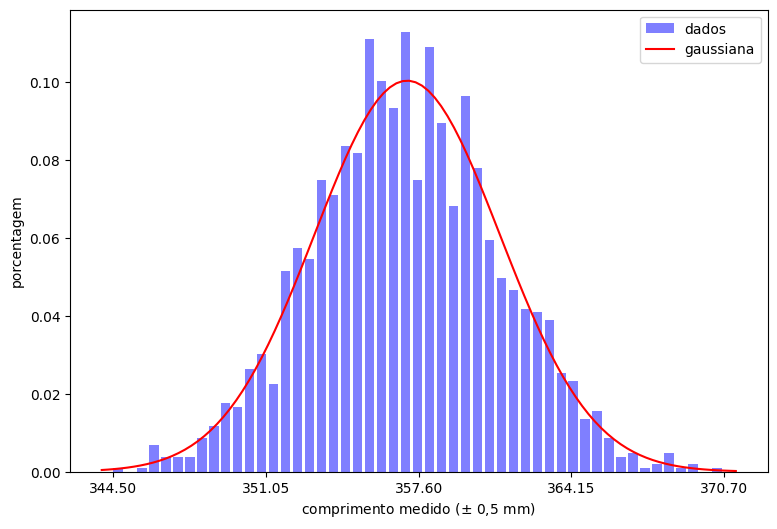

In [1]:
'''

     esse trecho de código simula as medidas que obtivemos
     

'''
# biblioteca numérica
import numpy as np

# biblioteca de gráficos
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline


# lendo os dados medidos
x_medida = np.round(np.loadtxt('pratica1_dados_comprimento.txt'), decimals=2)

# contando o número de dados
N = x_medida.shape[0]

# média dos dados medidos
x_medio = x_medida.mean()

# desvio padrão dos dados medidos
dx_std = x_medida.std()

# máximo e mínimo das medidas
xmax = x_medida.max()
xmin = x_medida.min()
Dx = xmax - xmin


# largura dos intervalos para fazer o histograma (em mm)
dbin=0.5
bins = int(Dx/dbin)-1

# fitando os dados com uma distribuição Gaussiana
x = np.linspace(xmin-dbin, xmax+dbin, 100)
gauss_fit = norm.pdf(x, x_medio, dx_std)

# figura com os nossos dados e uma Gaussiana sobreposta
fig, ax = plt.subplots(figsize=(9,6))
ax.hist(x_medida, bins=bins, color='b', width=0.8*dbin, alpha=0.5, density=1, align='mid',label='dados')
ax.plot(x, gauss_fit, c='r', label='gaussiana')

xticks = [xmin, xmin+Dx/4, xmin+Dx/2,xmin+ 3*Dx/4, xmax]
ax.set_xticks(xticks)
ax.set_xlabel('comprimento medido ($\pm$ 0,5 mm)')
ax.set_ylabel('porcentagem')

leg=ax.legend()





### Como expressar uma medida considerando sua incerteza

Aqui, ao falarmos sobre média cabe falarmos sobre <b> incerteza da medida </b>. Toda medida tem uma incerteza associada, seja devido à precisão do instrumento ou a erros de medida. Os erros mais importantes de se analisar são erros estatísticos que resultam de mudanças de condições experimentais não-controláveis que englobam o operador, o instrumento, o ambiente ou o próprio sistema medido.


No Laboratório de Física (e outros laboratórios) <b> sempre </b> que fizermos uma medida com um instrumento, seja uma única coleta ou diversas coletas, expressaremos a medida  

$$(x \pm \Delta x) \textrm{ u}$$

onde $x$ é o valor medido, $\Delta x$ é a incerteza da medida e u é a unidade. 


No caso de uma única medida $\Delta x$ nada mais é do que a precisão do instrumento. No caso de várias medidas, trabalhamos com os desvios médio e padrão. 

### Precisão do instrumento
Ao realizar uma medida individual de alguma grandeza (comprimento, massa, volume, tempo) a menor divisão da escala possível para aquele instrumento determina sua precisão. Existem escalas que podem gerar um pouco de dúvida. Por exemplo, no copo do liquidificador você até pode tentar preencher até a metade entre dois risquinhos. A capacidade de leitura do observador daquele instrumento específico determina qual a precisão possível para aquela medida. Via de regra, para instrumentos digitais, o menor dígito dá a precisão máxima. Para instrumentos analógicos, depende da escala. Usamos metade da menor divisão em mais 'grossas' (por exemplo, o copo do liquidificador ou mesmo uma proveta que mede $1$ mL) e exatamente a menor divisão em escalas mais 'finas' (por exemplo, um micrômetro ou um paquímetro). 

Nos exemplos acima, teríamos

- <b> Comprimentos: </b> dimensões do móvel medido com trena (você é incapaz de enxergar no meio da escala de $1$ mm)

Altura (H) $H=(750 \pm 1)$ mm 
Largura (L) $L= (455 \pm 1)$ mm
Comprimento (C) $C= (300 \pm 1)$ mm.  


- <b> Massa: </b> `peso' do polvilho medida na balança digital 

$M=(300,2 \pm 0,1)$ g


- <b> Volume: </b> quantidade de leite na vitamina medida com a jarra pyrex (considerando que você enxerga a metade entre os risquinhos de $100$ mL, de modo que a precisão que você atribui à leitura é de $50$ mL)

$V=(300 \pm 50)$ mL


- <b> Temperatura: </b> febre medida com termômetro de mercúrio

$T= (36,2 \pm 0,1)^{o}$C 


- <b> Tempo: </b> medida do tempo da prancha com o cronômetro do celular considerando $200$ms como tempo de resposta

$t=(4,2 \pm 0,2)$ s


### Desvio médio e desvio padrão
Ao coletar medidas diversas vezes, estamos tentando minimizar os erros aleatórios e, assim, tornando nossas medidas reprodutíveis. Imagine que no exemplo anterior da medida do comprimento do papel, aquele conjunto enorme de dados foi obtido a partir de todas as turmas de laboratório, mas cada grupo/trio coletou apenas $5$ medidas. Um dos grupos coletou o seguinte conjunto de dados

In [2]:
import pandas as pd
x_i = np.array([35.5, 35.0, 36.0, 35.5, 36.5])
pd.DataFrame(x_i, columns=["L ($\pm$ 0.5 mm)"])

,L ($\pm$ 0.5 mm)
0,35.5
1,35.0
2,36.0
3,35.5
4,36.5


In [3]:
# podemos obter o desvio médio e padrão a partir das bibliotecas python
media = x_i.mean()
desvio_padrao = x_i.std()

print(f'media (s/arredondamentos) = {media}')
print(f'desvio padrao (s/arredondamentos) = {desvio_padrao}')


media (s/arredondamentos) = 35.7
desvio padrao (s/arredondamentos) = 0.5099019513592785


In [4]:
# ou podemos calcular explicitamente
N = x_i.shape[0]
media = x_i.sum() / N
desvio_padrao = np.sqrt(((x_i-media)**2).sum() / (N-1))
desvio_medio = np.abs(x_i-media).sum() / N

print(f'media (s/arredondamentos) = {media}')
print(f'desvio padrao (s/arredondamentos) = {desvio_padrao}')
print(f'desvio médio (s/arredondamentos) = {desvio_medio}')

media (s/arredondamentos) = 35.7
desvio padrao (s/arredondamentos) = 0.570087712549569
desvio médio (s/arredondamentos) = 0.44000000000000056


### Arredondando com Python
Uma biblioteca conveniente para arredondamentos é a sigfif

In [5]:
import sigfig

In [6]:
# unidade de medida
unidade_de_medida = 'mm'

# media 
x_m = x_i.sum() / N

# desvio padrao
d_padrao = np.sqrt(((x_i - x_m)**2).sum() / (N-1))

# desvio medio
d_medio = (np.abs(x_i - x_m)).sum() / N
x_std = x_i.std()

print(f'-> x médio (s/arredondamentos): {x_m} {unidade_de_medida}')
print("")
print(f'-> desvio médio (s/arredondamentos): {d_medio} {unidade_de_medida}')
print(f'-> desvio padrão (s/arredondamentos): {d_padrao} {unidade_de_medida}')

d_medio_sig = sigfig.round(d_medio, sigfigs=1)
d_padrao_sig = sigfig.round(d_padrao, sigfigs=1)

print("")
print(f'-> desvio médio (1 algarismo significativo): {d_medio_sig} {unidade_de_medida}')
print(f'-> desvio padrão (1 algarismo significativo): {d_padrao_sig} {unidade_de_medida}')

d_final = np.max([d_medio_sig, d_padrao_sig])
print(f'-> maior dos desvios (1 algarismo significativo): {d_final} {unidade_de_medida}')

print("")
print(f'-> desvio médio (1 algarismo significativo): {d_medio_sig} {unidade_de_medida}')
print(f'-> desvio padrão (1 algarismo significativo): {d_padrao_sig} {unidade_de_medida}')


medida_dpadrao_sig = sigfig.round(str(x_m), str(d_padrao_sig))
medida_medio_sig = sigfig.round(str(x_m), str(d_medio_sig))
medida_final_sig = sigfig.round(str(x_m), str(d_final))

print("")
print(f'-> medida final (desvio padrão): ({medida_dpadrao_sig}) {unidade_de_medida}')
print(f'-> medida final (desvio médio): ({medida_medio_sig}){unidade_de_medida}')

print(f'-> medida final (maior desvio): ({medida_final_sig}) {unidade_de_medida}')

-> x médio (s/arredondamentos): 35.7 mm

-> desvio médio (s/arredondamentos): 0.44000000000000056 mm
-> desvio padrão (s/arredondamentos): 0.570087712549569 mm

-> desvio médio (1 algarismo significativo): 0.4 mm
-> desvio padrão (1 algarismo significativo): 0.6 mm
-> maior dos desvios (1 algarismo significativo): 0.6 mm

-> desvio médio (1 algarismo significativo): 0.4 mm
-> desvio padrão (1 algarismo significativo): 0.6 mm

-> medida final (desvio padrão): (35.7 ± 0.6) mm
-> medida final (desvio médio): (35.7 ± 0.4)mm
-> medida final (maior desvio): (35.7 ± 0.6) mm
